In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.add("PyPlot"); Pkg.add("ForwardDiff"); Pkg.instantiate()

  Activating project at `/workspaces/lecture-notebooks/Lecture 4`
   Resolving package versions...
    Updating `/workspaces/lecture-notebooks/Lecture 4/Project.toml`
  [d330b81b] + PyPlot v2.11.6
    Updating `/workspaces/lecture-notebooks/Lecture 4/Manifest.toml`
  [3da002f7] + ColorTypes v0.12.1
  [5ae59095] + Colors v0.13.1
  [8f4d0f93] + Conda v1.10.2
  [53c48c17] + FixedPointNumbers v0.8.5
  [682c06a0] + JSON v0.21.4
  [b964fa9f] + LaTeXStrings v1.4.0
  [1914dd2f] + MacroTools v0.5.16
  [69de0a69] + Parsers v2.8.3
⌅ [aea7be01] + PrecompileTools v1.2.1
  [21216c6a] + Preferences v1.5.0
  [438e738f] + PyCall v1.96.4
  [d330b81b] + PyPlot v2.11.6
  [189a3867] + Reexport v1.2.2
  [81def892] + VersionParsing v1.3.0
  [0dad84c5] + ArgTools v1.1.1
  [56f22d72] + Artifacts
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [f43a241f] + Downloads v1.6.0
  [7b1f6079] + FileWatching
  [b77e0a4c] + InteractiveUtils
  [b27032c2] + LibCURL v0.6.4
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [

In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
function f(x)
    return x.^4 + x.^3 - x.^2 - x
end

f (generic function with 1 method)

In [4]:
function ∇f(x)
    return 4.0*x.^3 + 3.0*x.^2 - 2.0*x - 1.0
end

∇f (generic function with 1 method)

In [5]:
function ∇2f(x)
    return 12.0*x.^2 + 6.0*x - 2.0
end

∇2f (generic function with 1 method)

In [6]:
x = LinRange(-1.75,1.25,1000)

1000-element LinRange{Float64, Int64}:
 -1.75, -1.747, -1.74399, -1.74099, …, 1.24099, 1.24399, 1.247, 1.25

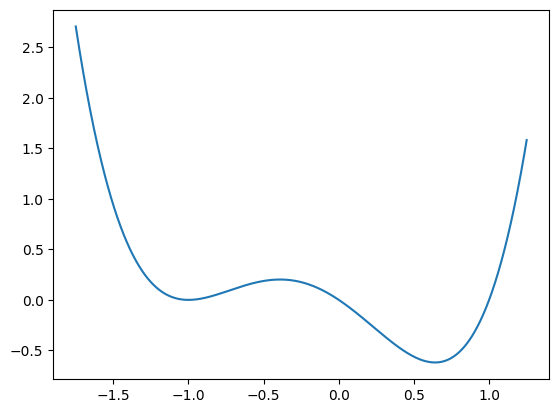

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb5281d7230>

In [7]:
p = plot(x,f(x))

In [8]:
function newton_step(x0)
    xn = x0 - ∇2f(x0)\∇f(x0)
end

newton_step (generic function with 1 method)

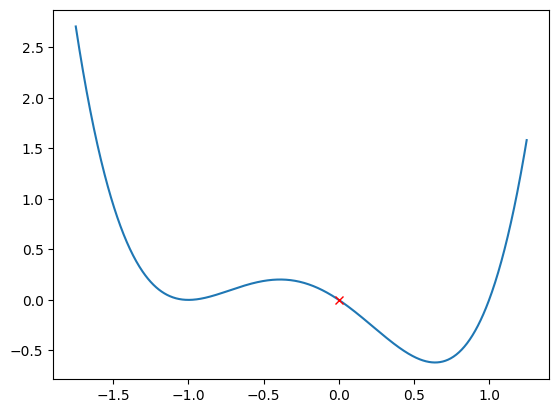

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb5311520f0>

In [9]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

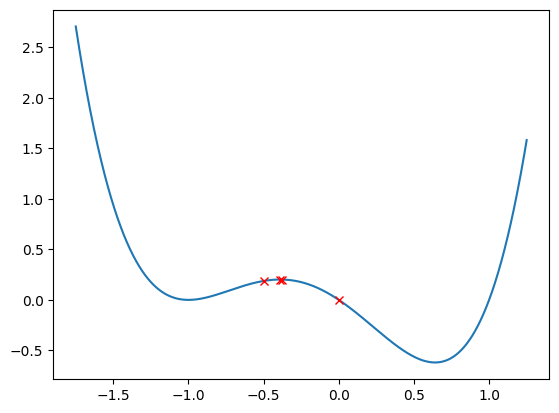

4-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb530f4dc70>
 PyObject <matplotlib.lines.Line2D object at 0x7eb530f4dd60>
 PyObject <matplotlib.lines.Line2D object at 0x7eb530f4de80>
 PyObject <matplotlib.lines.Line2D object at 0x7eb530f4dfa0>

In [12]:
xnew = newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [13]:
∇2f(0.0)

-2.0

In [14]:
function regularized_newton_step(x0)
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    xn = x0 - H\∇f(x0)
end

regularized_newton_step (generic function with 1 method)

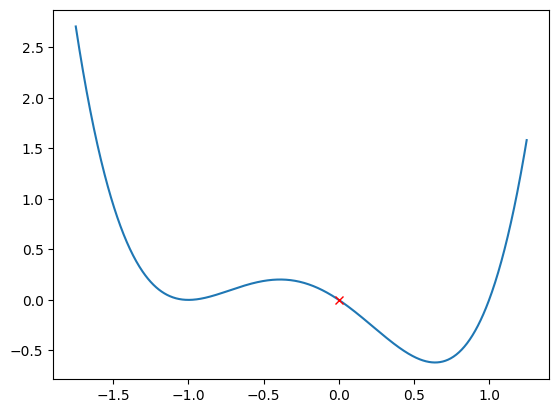

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb530fc95e0>

In [15]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

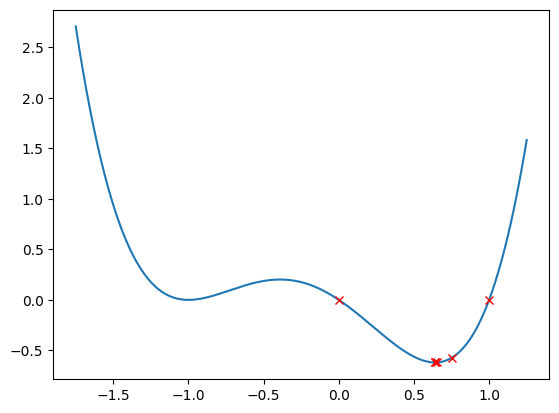

6-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb52ba052e0>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52bbe5dc0>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52ba05490>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52ba055b0>
 PyObject <matplotlib.lines.Line2D object at 0x7eb530e90d70>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52ba057c0>

In [20]:
xnew = regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")

In [38]:
function backtracking_regularized_newton_step(x0)
    b = 1e-4
    c = 0.5
    β = 1.0
    H = ∇2f(x0)
    while !isposdef(H)
        H = H + β*I
    end
    Δx = -H\∇f(x0)
    
    α = 1.0
    while f(x0 + α*Δx) > f(x0) + b*α*∇f(x0)*Δx
        α = c*α
    end
    print(α)
    xn = x0 + α*Δx
end

backtracking_regularized_newton_step (generic function with 1 method)

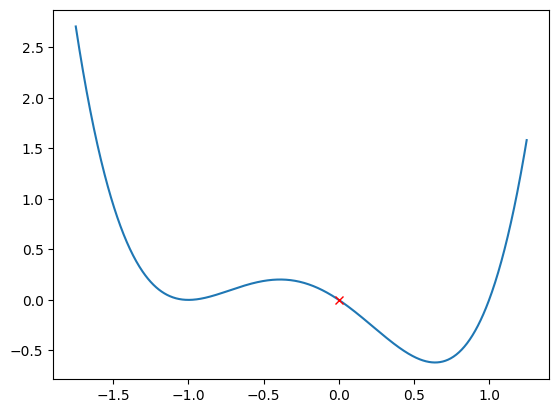

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb52b0d80e0>

In [39]:
xguess = 0.0
plot(x, f(x))
plot(xguess, f(xguess), "rx")

1.0

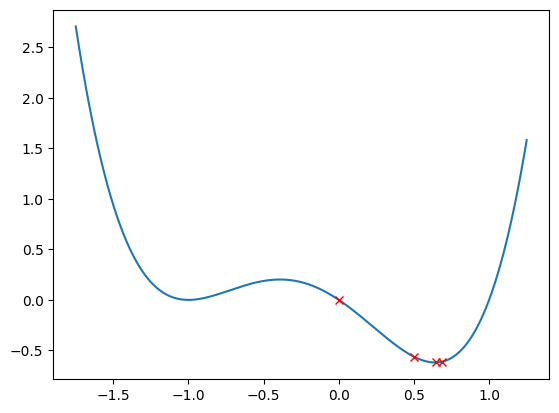

4-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7eb52a25ce30>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52a25cef0>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52a25cfe0>
 PyObject <matplotlib.lines.Line2D object at 0x7eb52a23cc50>

In [42]:
xnew = backtracking_regularized_newton_step(xguess[end])
xguess = [xguess xnew]
plot(x, f(x))
plot(xguess, f(xguess), "rx")